
-- MEAN VALUES (pre/post) --
iVol US Equities                        -0.038214
EUR Government Bonds                     0.361126
Germany 10-Year Government Bond Yield   -1.995238
Eurozone Core Inflation                  0.114683
dtype: float64
iVol US Equities                        -0.045549
EUR Government Bonds                     0.362191
Germany 10-Year Government Bond Yield   -2.001234
Eurozone Core Inflation                  0.113703
dtype: float64

-- CORRELATION (pre/post) --
0.07185714983785937
0.10051018580896107


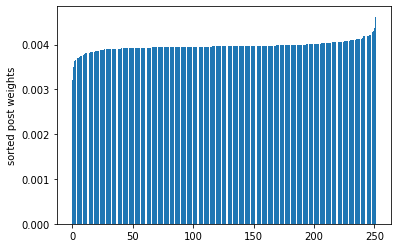

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import entropy_pooling as ep
data = ep.views.load_debug(data = pd.read_excel("Data/data.xlsx"), views_subsheet_name = 8, views_sheet_name = "Data/sample_portfolio2_views.xlsx")
(A,b,C,d) = data
#print(A,b)
scenarios = pd.read_excel("Data/data.xlsx")
sample = scenarios[['iVol US Equities','EUR Government Bonds','Germany 10-Year Government Bond Yield','Eurozone Core Inflation']]

def weighted_mean(x, w):
    #print((x).size)
    #print((w).size)
    return np.sum(np.array(x) * np.array(w)) / np.sum(w)

def weighted_std(values, weights):
    avg = np.sum(values * weights) / np.sum(weights)
    # Fast and numerically precise:
    variance = np.sum((values-avg)**2 * weights) / np.sum(weights)
    res = np.sqrt(variance)
    return pd.DataFrame([res], columns=values.columns).mean() # mean just to format the rows to one

def weighted_cov(x,y, weights):
    weights = np.asarray(weights.T)[0] # formatting magic
    avg_x = np.sum(x * weights) / np.sum(weights)
    avg_y = np.sum(y * weights) / np.sum(weights)
    res = np.sum((x-avg_x)*(y-avg_y)*weights) / np.sum(weights)
    return res

def weighted_cov1(x, y, w):
    return np.sum(w * np.array(x - weighted_mean(x, w)) * np.array(y - weighted_mean(y, w))) / np.sum(w)

def weighted_corr(x, y, w):
    return weighted_cov(x, y, w) / np.sqrt(weighted_cov(x, x, w) * weighted_cov(y, y, w))

def print_means(scenarios, weights):
    means = sample.multiply(weights,axis=0).sum()
    print(means) # out in precentages 0.06 => 6 %

def print_vols(scenarios, weights):
    print(weighted_std(sample, weights)) # out in precentages 0.06 => 6 %

m,n = scenarios.shape
pre = np.ones((1,m)).T/m
post = ep.entropy_minimizer.full_confidence_posterior(pre, A, b, C, d)
post = np.array([post]).T

print('\n-- MEAN VALUES (pre/post) --')
print(sample.mean())
#print_means(sample, pre)
print_means(sample, post)

#print('\n-- VOLATILITY (pre/post) --')
#print_vols(sample, pre)
#print_vols(sample, post)

print('\n-- CORRELATION (pre/post) --')	
print(weighted_corr(sample['iVol US Equities'], sample['EUR Government Bonds'], pre))
print(weighted_corr(sample['iVol US Equities'], sample['EUR Government Bonds'], post))

# Kiva kuva
plt.bar(range(len(post)),np.sort(post.T[0]))
plt.ylabel('sorted post weights')
plt.show()
#plt.savefig('line_plot_{}.pdf'.format(index))

In [2]:
# Number of points "active" in post
# limit the values of w's elements to 1/n, and sum them up => percentage of active points

fraction = np.array([post.T[0], 1/post.size + post.T[0]*0]).min(axis=0).sum()
if fraction * post.size <= 20:
    print('Warning! Small data sample recovered!')
print("{:.1f} % of datapoints still active.".format( fraction * 100 ))
print("{:.1f} datapoints still active.".format( fraction * post.size ))

93.6 % of datapoints still active.
235.8 datapoints still active.


In [7]:
print(A.dot(np.ones((1,m)).T/m)  ,b)

[[1.]] [[1.]]


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import entropy_pooling as ep

titles = ['Rates up', 'Rates down', 'Eq up', 'Eq down', 'Inflation up', 'Inflation down', 'Vix up', 'Vix down']
for i in range(8):
    data = ep.views.load_debug(data = pd.read_excel("Data/data.xlsx"), views_subsheet_name = i, views_sheet_name = "Data/sample_portfolio2_views.xlsx")
    (A,b,C,d) = data
    scenarios = pd.read_excel("Data/data.xlsx")
    m,n = scenarios.shape
    pre = np.ones((1,m)).T/m
    post = ep.entropy_minimizer.full_confidence_posterior(pre, A, b, C, d)
    post = np.array([post]).T
    plt_1 = plt.figure(figsize=(6.4*0.7*1.3, 4.8*0.71))
    plt.bar(range(len(post)),np.sort(post.T[0]),width=1, label='Posterior distribution (sorted)',color='lightskyblue')
    plt.plot([0,252],[1/253,1/253],'k--', label="Prior disribution")
    plt.ylabel('Distribution (weight)')
    plt.xlabel('Scenario index (sorted)')
    if i in [2,4]:
        plt.legend(loc=3)
    else:
        plt.legend(loc=2)
    plt.title(titles[i], fontsize= 15, fontweight='bold')
    #plt.show()
    plt.savefig('plots/post_dist_{}.pdf'.format(i+1))
    plt.clf()

     pcost       dcost       gap    pres   dres
 0: -1.0156e+03 -1.0106e+03  2e+00  1e+00  0e+00
 1: -1.0075e+03 -1.0080e+03  5e-01  0e+00  4e-17
 2: -1.0080e+03 -1.0080e+03  5e-03  0e+00  4e-17
 3: -1.0080e+03 -1.0080e+03  5e-05  0e+00  4e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.0171e+03 -1.0151e+03  1e+00  1e+00  1e-17
 1: -1.0143e+03 -1.0140e+03  3e-02  5e-02  2e-17
 2: -1.0140e+03 -1.0140e+03  3e-04  4e-04  5e-17
 3: -1.0140e+03 -1.0140e+03  3e-06  4e-06  1e-16
 4: -1.0140e+03 -1.0140e+03  3e-08  4e-08  1e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.0181e+03 -1.0181e+03  2e-01  1e+00  1e-17
 1: -1.0181e+03 -1.0180e+03  3e-03  2e-01  2e-18
 2: -1.0180e+03 -1.0180e+03  1e-03  0e+00  1e-18
 3: -1.0180e+03 -1.0180e+03  1e-05  0e+00  0e+00
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.0178e+03 -1.0172e+03  8e-01  2e+00  2e-18
 1: -1.0173e+03 -1.0170e+03  1e-02  3e-01  5e-18
 

<Figure size 419.328x245.376 with 0 Axes>

<Figure size 419.328x245.376 with 0 Axes>

<Figure size 419.328x245.376 with 0 Axes>

<Figure size 419.328x245.376 with 0 Axes>

<Figure size 419.328x245.376 with 0 Axes>

<Figure size 419.328x245.376 with 0 Axes>

<Figure size 419.328x245.376 with 0 Axes>

<Figure size 419.328x245.376 with 0 Axes>